<a href="https://colab.research.google.com/github/mella30/Deep-Learning-with-Tensorflow-2/blob/main/Course1-Getting_started_with_TensorFlow_2/week4_loading_saving.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
print(tf.__version__)

2.5.0


# Saving and loading models

 ## Coding tutorials
 #### [1. Saving and loading model weights](#coding_tutorial_1)
 #### [2. Model saving criteria](#coding_tutorial_2)
 #### [3. Saving the entire model](#coding_tutorial_3)
 #### [4. Loading pre-trained Keras models](#coding_tutorial_4)
 #### [5. Tensorflow Hub modules](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Saving and loading model weights

#### Load and inspect CIFAR-10 dataset

The CIFAR-10 dataset consists of, in total, 60000 color images, each with one of 10 labels: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck. For an introduction and a download, see [this link](https://www.cs.toronto.edu/~kriz/cifar.html).

In [36]:
# Import the CIFAR-10 dataset and rescale the pixel values

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# Use smaller subset -- speeds things up
x_train = x_train[:10000]
y_train = y_train[:10000]
x_test = x_test[:1000]
y_test = y_test[:1000]

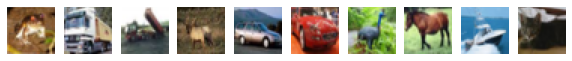

In [4]:
# Plot the first 10 CIFAR-10 images

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 10, figsize=(10, 1))
for i in range(10):
    ax[i].set_axis_off()
    ax[i].imshow(x_train[i])

#### Introduce two useful functions

In [5]:
# Introduce function to test model accuracy

def get_test_accuracy(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x=x_test, y=y_test, verbose=0)
    print('accuracy: {acc:0.3f}'.format(acc=test_acc))

In [6]:
# Introduce function that creates a new instance of a simple CNN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

def get_new_model():
    model = Sequential([
        Conv2D(filters=16, input_shape=(32, 32, 3), kernel_size=(3, 3), activation='relu', name='conv_1'),
        Conv2D(filters=8, kernel_size=(3, 3), activation='relu', name='conv_2'),
        MaxPooling2D(pool_size=(4, 4), name='pool_1'),
        Flatten(name='flatten'),
        Dense(units=32, activation='relu', name='dense_1'),
        Dense(units=10, activation='softmax', name='dense_2')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

#### Create simple convolutional neural network classifier

In [7]:
# Create an instance of the model and show model summary

model = get_new_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
conv_2 (Conv2D)              (None, 28, 28, 8)         1160      
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 7, 7, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 392)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                12576     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 14,514
Trainable params: 14,514
Non-trainable params: 0
____________________________________________________

In [8]:
# Test accuracy of the untrained model, around 10% (random)

get_test_accuracy(model, x_test, y_test)

accuracy: 0.085


#### Train model with checkpoints

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [10]:
# Create Tensorflow checkpoint object

checkpoint_path = 'model_checkpoints/checkpoint'
checkpoint = ModelCheckpoint(filepath=checkpoint_path,  # overwrite file 
                             frequency='epoch', 
                             save_weights_only=True, 
                             verbose=1)

In [11]:
# Fit model, with simple checkpoint which saves (and overwrites) model weights every epoch

model.fit(x_train, y_train, epochs=3, callbacks=[checkpoint])

Epoch 1/3
313/313 [==============================] - 11s 34ms/step - loss: 1.9872 - accuracy: 0.2771

Epoch 00001: saving model to model_checkpoints/checkpoint
Epoch 2/3
313/313 [==============================] - 11s 34ms/step - loss: 1.6733 - accuracy: 0.4060

Epoch 00002: saving model to model_checkpoints/checkpoint
Epoch 3/3
313/313 [==============================] - 11s 34ms/step - loss: 1.5244 - accuracy: 0.4581

Epoch 00003: saving model to model_checkpoints/checkpoint


In [12]:
# Have a look at what the checkpoint creates

! ls -lh model_checkpoints/  # executes unix commands

total 184K
-rw-r--r-- 1 root root   77 Jul  1 15:04 checkpoint
-rw-r--r-- 1 root root 174K Jul  1 15:04 checkpoint.data-00000-of-00001
-rw-r--r-- 1 root root 2.0K Jul  1 15:04 checkpoint.index


In [13]:
# Evaluate the performance of the trained model

get_test_accuracy(model, x_test, y_test)

accuracy: 0.458


#### Create new model, load weights

In [14]:
# Create a new instance of the (initialised) model, accuracy around 10% again

new_model = get_new_model()
get_test_accuracy(new_model, x_test, y_test)

accuracy: 0.095


In [15]:
# Load weights -- accuracy is the same as the trained model

new_model.load_weights(checkpoint_path)
get_test_accuracy(new_model, x_test, y_test)

accuracy: 0.458


In [17]:
# Continue training

new_model.fit(x_train, y_train, epochs=3, callbacks=[checkpoint])
get_test_accuracy(new_model, x_test, y_test)

Epoch 1/3
313/313 [==============================] - 10s 33ms/step - loss: 1.3908 - accuracy: 0.5031

Epoch 00001: saving model to model_checkpoints/checkpoint
Epoch 2/3
313/313 [==============================] - 10s 33ms/step - loss: 1.3326 - accuracy: 0.5279

Epoch 00002: saving model to model_checkpoints/checkpoint
Epoch 3/3
313/313 [==============================] - 10s 33ms/step - loss: 1.2790 - accuracy: 0.5446

Epoch 00003: saving model to model_checkpoints/checkpoint
accuracy: 0.524


#### Clear directory

In [18]:
! rm -r model_checkpoints

***
<a id="coding_tutorial_2"></a>
## Model saving criteria

#### Create more customised checkpoint

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [20]:
# Create Tensorflow checkpoint object with epoch and batch details

checkpoint_500_path = 'model_checkpoints_500/checkpoint_{epoch:02d}_{loss:.2f}'
checkpoint_500 = ModelCheckpoint(filepath=checkpoint_500_path, 
                                 save_weights_only=True, 
                                 save_freq=500, 
                                 verbose=1)

In [21]:
# Create and fit model with checkpoint

model_500 = get_new_model()
model_500.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test), batch_size=10, callbacks=[checkpoint_500])

Epoch 1/3
 496/1000 [=============>................] - ETA: 6s - loss: 2.0466 - accuracy: 0.2353
Epoch 00001: saving model to model_checkpoints_500/checkpoint_01_2.05
 997/1000 [============================>.] - ETA: 0s - loss: 1.8854 - accuracy: 0.3020
Epoch 00001: saving model to model_checkpoints_500/checkpoint_01_1.89
1000/1000 [==============================] - 13s 13ms/step - loss: 1.8850 - accuracy: 0.3021 - val_loss: 1.6950 - val_accuracy: 0.3710
Epoch 2/3
 496/1000 [=============>................] - ETA: 6s - loss: 1.5506 - accuracy: 0.4361
Epoch 00002: saving model to model_checkpoints_500/checkpoint_02_1.55
 999/1000 [============================>.] - ETA: 0s - loss: 1.5157 - accuracy: 0.4466
Epoch 00002: saving model to model_checkpoints_500/checkpoint_02_1.52
1000/1000 [==============================] - 12s 12ms/step - loss: 1.5155 - accuracy: 0.4467 - val_loss: 1.4767 - val_accuracy: 0.5010
Epoch 3/3
 499/1000 [=============>................] - ETA: 6s - loss: 1.3669 - ac

In [23]:
# Have a look at what the checkpoint creates

! ls -lh model_checkpoints_500/

total 1.1M
-rw-r--r-- 1 root root   93 Jul  1 15:06 checkpoint
-rw-r--r-- 1 root root 174K Jul  1 15:05 checkpoint_01_1.89.data-00000-of-00001
-rw-r--r-- 1 root root 2.0K Jul  1 15:05 checkpoint_01_1.89.index
-rw-r--r-- 1 root root 174K Jul  1 15:05 checkpoint_01_2.05.data-00000-of-00001
-rw-r--r-- 1 root root 2.0K Jul  1 15:05 checkpoint_01_2.05.index
-rw-r--r-- 1 root root 174K Jul  1 15:06 checkpoint_02_1.52.data-00000-of-00001
-rw-r--r-- 1 root root 2.0K Jul  1 15:06 checkpoint_02_1.52.index
-rw-r--r-- 1 root root 174K Jul  1 15:05 checkpoint_02_1.55.data-00000-of-00001
-rw-r--r-- 1 root root 2.0K Jul  1 15:05 checkpoint_02_1.55.index
-rw-r--r-- 1 root root 174K Jul  1 15:06 checkpoint_03_1.35.data-00000-of-00001
-rw-r--r-- 1 root root 2.0K Jul  1 15:06 checkpoint_03_1.35.index
-rw-r--r-- 1 root root 174K Jul  1 15:06 checkpoint_03_1.37.data-00000-of-00001
-rw-r--r-- 1 root root 2.0K Jul  1 15:06 checkpoint_03_1.37.index


#### Work with model saving criteria

In [24]:
# Use tiny training and test set -- will overfit!

x_train_t = x_train[:100]
y_train_t = y_train[:100]
x_test_t = x_test[:100]
y_test_t = y_test[:100]

In [25]:
# Create a new instance of untrained model

best_model = get_new_model()

In [26]:
# Create Tensorflow checkpoint object which monitors the validation accuracy

checkpoint_best_path = 'model_checkpoint_best/checkpoint'
checkpoint_best = ModelCheckpoint(filepath=checkpoint_best_path,
                                  monitor='val_accuracy',
                                  save_weights_only=True,
                                  save_freq='epoch',
                                  save_best_only=True,
                                  verbose=1)

In [27]:
# Fit the model and save only the weights with the highest validation accuracy

history = best_model.fit(x_train_t, y_train_t, epochs=50, validation_data=(x_test, y_test), batch_size=10, callbacks=[checkpoint_best], verbose=0)


Epoch 00001: val_accuracy improved from -inf to 0.46000, saving model to model_checkpoint_best/checkpoint

Epoch 00002: val_accuracy improved from 0.46000 to 0.51000, saving model to model_checkpoint_best/checkpoint

Epoch 00003: val_accuracy did not improve from 0.51000

Epoch 00004: val_accuracy did not improve from 0.51000

Epoch 00005: val_accuracy did not improve from 0.51000

Epoch 00006: val_accuracy did not improve from 0.51000

Epoch 00007: val_accuracy did not improve from 0.51000

Epoch 00008: val_accuracy did not improve from 0.51000

Epoch 00009: val_accuracy did not improve from 0.51000

Epoch 00010: val_accuracy did not improve from 0.51000

Epoch 00011: val_accuracy did not improve from 0.51000

Epoch 00012: val_accuracy did not improve from 0.51000

Epoch 00013: val_accuracy did not improve from 0.51000

Epoch 00014: val_accuracy did not improve from 0.51000

Epoch 00015: val_accuracy did not improve from 0.51000

Epoch 00016: val_accuracy did not improve from 0.51000

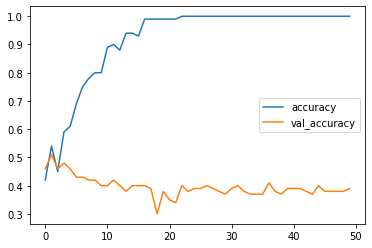

In [28]:
# Plot training and testing curves

import pandas as pd

df = pd.DataFrame(history.history)
df.plot(y=['accuracy', 'val_accuracy'])

In [29]:
# Inspect the checkpoint directory

! ls -lh model_checkpoint_best/

total 184K
-rw-r--r-- 1 root root   77 Jul  1 15:06 checkpoint
-rw-r--r-- 1 root root 174K Jul  1 15:06 checkpoint.data-00000-of-00001
-rw-r--r-- 1 root root 2.0K Jul  1 15:06 checkpoint.index


In [30]:
# Create a new model with the saved weights

new_best_model = get_new_model()
new_best_model.load_weights(checkpoint_best_path)
get_test_accuracy(new_best_model, x_test, y_test)


accuracy: 0.510


#### Clear directory

In [ ]:
! rm -r model_checkpoints_500 model_checkpoint_best

***
<a id="coding_tutorial_3"></a>
## Saving the entire model

#### Create checkpoint that saves whole model, not just weights

In [33]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [55]:
# Create Tensorflow checkpoint object

model_checkpoint_path = 'model_checkpoints_path'  # when saving the full model, tf creates a directory on its own
model_checkpoint = ModelCheckpoint(filepath=model_checkpoint_path,
                                   save_weights_only=False,
                                   frequency='epochs',
                                   verbose=1)   

In [47]:
# Create and fit model with checkpoint

full_model = get_new_model()
full_model.fit(x_train, y_train, epochs=3, callbacks=[model_checkpoint])

Epoch 1/3
313/313 [==============================] - 11s 33ms/step - loss: 2.0073 - accuracy: 0.2614

Epoch 00001: saving model to model_checkpoints_path
INFO:tensorflow:Assets written to: model_checkpoints_path/assets
Epoch 2/3
313/313 [==============================] - 10s 33ms/step - loss: 1.6499 - accuracy: 0.4002

Epoch 00002: saving model to model_checkpoints_path
INFO:tensorflow:Assets written to: model_checkpoints_path/assets
Epoch 3/3
313/313 [==============================] - 10s 33ms/step - loss: 1.5287 - accuracy: 0.4438

Epoch 00003: saving model to model_checkpoints_path
INFO:tensorflow:Assets written to: model_checkpoints_path/assets


#### Inspect what the checkpoint has created

In [48]:
# Have a look at what the checkpoint creates

! ls -lh model_checkpoints_path

total 156K
drwxr-xr-x 2 root root 4.0K Jul  1 15:15 assets
-rw-r--r-- 1 root root  14K Jul  1 15:19 keras_metadata.pb
-rw-r--r-- 1 root root 131K Jul  1 15:19 saved_model.pb
drwxr-xr-x 2 root root 4.0K Jul  1 15:19 variables


In [49]:
# Enter variables directory

! ls -lh model_checkpoints_path/variables

total 184K
-rw-r--r-- 1 root root 177K Jul  1 15:19 variables.data-00000-of-00001
-rw-r--r-- 1 root root 2.2K Jul  1 15:19 variables.index


In [51]:
# Get the model's test accuracy

get_test_accuracy(full_model, x_test, y_test)

accuracy: 0.431


#### Create new model from scratch

In [52]:
from tensorflow.keras.models import load_model

In [60]:
# Reload model from scratch

loaded_model = load_model(model_checkpoint_path)
get_test_accuracy(loaded_model, x_test, y_test)

accuracy: 0.431


#### Use the .h5 format to save model

In [63]:
# Save the model in .h5 format

loaded_model.save('my_model.h5')

In [64]:
# Inspect .h5 file

! ls -lh my_model.h5

-rw-r--r-- 1 root root 77K Jul  1 15:30 my_model.h5


In [65]:
# Reload model from scratch

loaded_h5model = load_model('my_model.h5')
get_test_accuracy(loaded_h5model, x_test, y_test)

accuracy: 0.431


#### Clear directory

In [ ]:
! rm -r model_checkpoint
! rm my_model.h5

***
<a id="coding_tutorial_4"></a>
## Loading pre-trained Keras models

#### Import and build Keras ResNet50 model

Today we'll be using the ResNet50 model designed by a team at Microsoft Research, available through Keras applications. Please see the description on the [Keras applications page](https://keras.io/applications/#resnet) for details. If you continue using it, please cite it properly! The paper it comes from is:

Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun. "Deep Residual Learning for Image Recognition", 2015.

In the coding tutorial on Coursera, this model is loaded directly from disk. On Colab, you will load the model using the Keras API.

In [71]:
from tensorflow.keras.applications import ResNet50

model = ResNet50(weights='imagenet')
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

#### Import and preprocess 3 sample images

In [69]:
# Retrieve the image files

!wget -q -O lemon.jpg --no-check-certificate "https://docs.google.com/uc?export=download&id=1JSgQ9qgi9nO9t2aGEk-zA6lzYNUT9vZJ"
!wget -q -O viaduct.jpg --no-check-certificate "https://docs.google.com/uc?export=download&id=1sQzMKmyCR5Tur19lP3n1IIlEMG_o6Mct"
!wget -q -O water_tower.jpg --no-check-certificate "https://docs.google.com/uc?export=download&id=1cPAQD1O6mAiMbg0fmG5HIk8OuO_BSC6J"

In [70]:
# Import 3 sample ImageNet images

from tensorflow.keras.preprocessing.image import load_img

lemon_img = load_img('lemon.jpg', target_size=(224, 224))
viaduct_img = load_img('viaduct.jpg', target_size=(224, 224))
water_tower_img = load_img('water_tower.jpg', target_size=(224, 224))

#### Use ResNet50 model to classify images

In [72]:
# Useful function: presents top 5 predictions and probabilities

from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import pandas as pd

def get_top_5_predictions(img):
    x = img_to_array(img)[np.newaxis, ...]
    x = preprocess_input(x)
    preds = decode_predictions(model.predict(x), top=5)
    top_preds = pd.DataFrame(columns=['prediction', 'probability'],
                             index=np.arange(5)+1)
    for i in range(5):
        top_preds.loc[i+1, 'prediction'] = preds[0][i][1]
        top_preds.loc[i+1, 'probability'] = preds[0][i][2] 
    return top_preds

##### Image 1: lemon

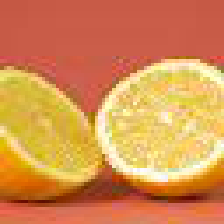

In [73]:
# Display image

lemon_img

In [74]:
# Display top 5 predictions

get_top_5_predictions(lemon_img)

40960/35363 [==================================] - 0s 0us/step


,prediction,probability
1,consomme,0.227801
2,lemon,0.221758
3,eggnog,0.151335
4,ladle,0.0400882
5,spotlight,0.0291972


##### Image 2: viaduct

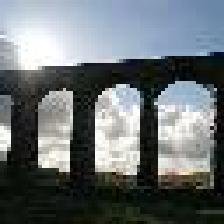

In [75]:
# Display image

viaduct_img

In [76]:
# Display top 5 predictions

get_top_5_predictions(viaduct_img)

,prediction,probability
1,vault,0.367951
2,prison,0.111742
3,viaduct,0.110737
4,window_screen,0.0882307
5,fire_screen,0.0206752


##### Image 3: water tower

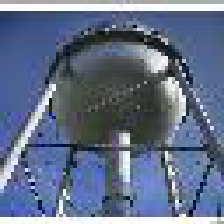

In [77]:
# Display image

water_tower_img

In [78]:
# Display top 5 predictions

get_top_5_predictions(water_tower_img)

,prediction,probability
1,solar_dish,0.384682
2,ladle,0.196178
3,planetarium,0.116683
4,strainer,0.04999
5,jigsaw_puzzle,0.0219474


***
<a id="coding_tutorial_5"></a>
## Tensorflow Hub modules

#### Import and build Tensorflow Hub MobileNet v1 model

Today we'll be using Google's MobileNet v1 model, available on Tensorflow Hub. Please see the description on the [Tensorflow Hub page](https://tfhub.dev/google/imagenet/mobilenet_v1_050_160/classification/4) for details on it's architecture, how it's trained, and the reference. If you continue using it, please cite it properly! The paper it comes from is:

Andrew G. Howard, Menglong Zhu, Bo Chen, Dmitry Kalenichenko, Weijun Wang, Tobias Weyand, Marco Andreetto, Hartwig Adam: "MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Applications", 2017.

In the coding tutorial on Coursera, this model is loaded directly from disk. On Colab, you will load the model from TensorFlow Hub.

In [79]:
import tensorflow_hub as hub

In [84]:
# Build Google's Mobilenet v1 model

module_url = "https://tfhub.dev/google/imagenet/mobilenet_v1_050_160/classification/4"
model = Sequential([hub.KerasLayer(module_url)])
model.build(input_shape=[None, 160, 160, 3])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1001)              1343049   
Total params: 1,343,049
Trainable params: 0
Non-trainable params: 1,343,049
_________________________________________________________________


#### Use MobileNet model to classify images

In [85]:
# Retrieve the image files

!wget -q -O lemon.jpg --no-check-certificate "https://docs.google.com/uc?export=download&id=1JSgQ9qgi9nO9t2aGEk-zA6lzYNUT9vZJ"
!wget -q -O viaduct.jpg --no-check-certificate "https://docs.google.com/uc?export=download&id=1sQzMKmyCR5Tur19lP3n1IIlEMG_o6Mct"
!wget -q -O water_tower.jpg --no-check-certificate "https://docs.google.com/uc?export=download&id=1cPAQD1O6mAiMbg0fmG5HIk8OuO_BSC6J"

In [86]:
# Import and preprocess 3 sample ImageNet images

from tensorflow.keras.preprocessing.image import load_img

lemon_img = load_img("lemon.jpg", target_size=(160, 160))
viaduct_img = load_img("viaduct.jpg", target_size=(160, 160))
water_tower_img = load_img("water_tower.jpg", target_size=(160, 160))

In [94]:
# Read in categories text file (taken from https://tfhub.dev/google/imagenet/mobilenet_v1_100_128/classification/5)

with open('imagenet_categories.txt') as txt_file:
    categories = txt_file.read().splitlines()

In [95]:
# Useful function: presents top 5 predictions

import pandas as pd

def get_top_5_predictions(img):
    x = img_to_array(img)[np.newaxis, ...] / 255.0
    preds = model.predict(x)
    top_preds = pd.DataFrame(columns=['prediction'],
                             index=np.arange(5)+1)
    sorted_index = np.argsort(-preds[0])
    for i in range(5):
        ith_pred = categories[sorted_index[i]]
        top_preds.loc[i+1, 'prediction'] = ith_pred
            
    return top_preds

##### Image 1: lemon

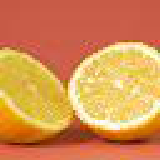

In [90]:
# Display image

lemon_img

In [96]:
# Display top 5 predictions

get_top_5_predictions(lemon_img)

,prediction
1,shower cap
2,tray
3,candle
4,brassiere
5,African chameleon


##### Image 2: viaduct

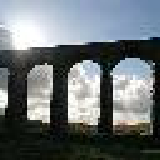

In [97]:
# Display image

viaduct_img

In [98]:
# Display top 5 predictions

get_top_5_predictions(viaduct_img)

,prediction
1,viaduct
2,pier
3,dam
4,prison
5,solar dish


##### Image 3: water tower

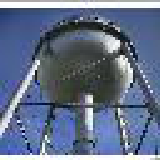

In [99]:
# Display image

water_tower_img

In [100]:
# Display top 5 predictions

get_top_5_predictions(water_tower_img)

,prediction
1,solar dish
2,water tower
3,aircraft carrier
4,jigsaw puzzle
5,oxygen mask
